<a href="https://colab.research.google.com/github/ChihabEddine98/DL_course/blob/main/lec2_regression_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports 
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
import matplotlib.pyplot as plt
import pandas as pd
# end imports

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data,val_data,train_targets,val_targets = train_test_split(train_data,train_targets,test_size = 0.2) 
s_scaler = StandardScaler()
train_data = s_scaler.fit_transform(train_data)
val_data = s_scaler.fit_transform(val_data)
test_data = s_scaler.fit_transform(test_data)


In [4]:
def HPREG(train_data):
  model = Sequential(Dense(64 , activation='relu' , input_dim = train_data.shape[1])) # Input Layer
  model.add(Dense(64 , activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(1 , activation='relu')) # Output Layer

  # Compile the model 
  model.compile(optimizer = 'adam' , loss= 'mse', metrics = ['mse','mape'])
  print(model.summary())
  return model

In [5]:
def train(model,train_data,train_targets,val_data,val_targets):
    with tf.device('/device:GPU:0'):
      history = model.fit(train_data,train_targets , epochs = 1000, batch_size = 128 , verbose = 1 , validation_data =(val_data,val_targets))
    return history.history

In [6]:
model = HPREG(train_data)
history = train(model,train_data,train_targets,val_data,val_targets)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
3/3 [==============================] - 1s 123ms/step - loss: 573.3240 - mse: 573.3240 - mape: 97.4389 

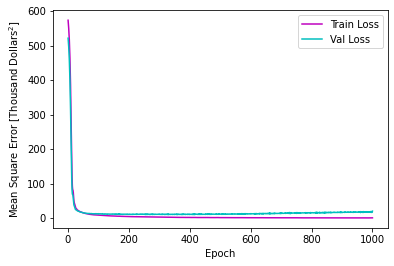

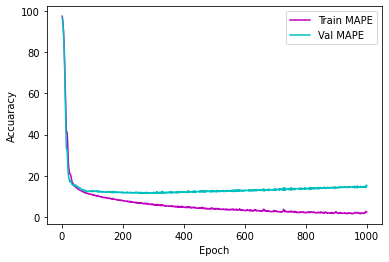

In [7]:
def plot_history(epochs,history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    #plt.plot(epochs, history['mse'],'r', label='Train Error')
    #plt.plot(epochs, history['val_mse'],'b', label = 'Val Error')
    plt.plot(epochs, history['loss'],'m', label='Train Loss')
    plt.plot(epochs, history['val_loss'],'c', label = 'Val Loss')
    plt.legend()

def plot_accuracy(epochs,history): 
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuaracy')
    plt.plot(epochs, history['mape'],'m', label='Train MAPE')
    plt.plot(epochs, history['val_mape'],'c', label = 'Val MAPE')
    plt.legend()

epochs = range(1,1001)
plot_history(epochs,history)
plot_accuracy(epochs,history)

# 3- Cross-Validation

In [8]:
import numpy as np

# We load again the data (because the first was alredy splitted)
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

nb_folds = 3
nb_samples_by_fold = len(train_data) // nb_folds
scores = []

for i in range(nb_folds):
    print(f'Working on fold #[{i+1}]...')
    val_data = train_data[i * nb_samples_by_fold : (i+1) * nb_samples_by_fold]
    val_targets = train_targets[i * nb_samples_by_fold : (i+1) * nb_samples_by_fold]
    
    train_data_i = np.concatenate(
                            [train_data[:i * nb_samples_by_fold],
                            train_data[(i+1) * nb_samples_by_fold:]],
                            axis=0)
    train_targets_i = np.concatenate(
                            [train_targets[:i * nb_samples_by_fold],
                            train_targets[(i+1)*nb_samples_by_fold:]],
                            axis=0)
    
    model = HPREG(train_data_i)
    history = train(model,train_data_i,train_targets_i,val_data,val_targets)

    score = model.evaluate(val_data, val_targets, verbose=1)
    scores.append(score)

Working on fold #[0]...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
3/3 [==============================] - 1s 102ms/step - loss: 120.9261 - mse:

KeyboardInterrupt: ignored

In [ ]:
loss_scores = list(map(lambda x: x[0],scores))
mean_loss = np.mean(loss_scores)
mean_loss